In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import scipy.ndimage
import pandas as pd

## Cargar Datos

4423680/4422102 [==============================] - 2s 1us/step


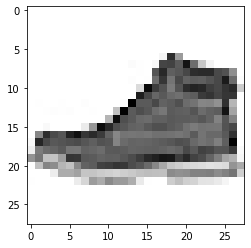

In [2]:
# Descargar el mnist de Keras
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Imprimir un sample
import matplotlib.pyplot as plt
plt.imshow(x_train[89], cmap='Greys')
plt.show()

## Normalizar Imagenes

In [3]:
# Scaling para que las imagenes queden de [0,1]
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = x_train.reshape(len(x_train),28,28)
x_test = x_test.reshape(len(x_test),28,28)

x_train.shape

(60000, 28, 28)

In [4]:
labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
y_train = pd.Series(y_train, dtype="category")
y_test = pd.Series(y_test, dtype="category")

## Arquitetura Perceptron

#### Acerca de Dropout

Aplica Dropout al input.

La capa de Dropout establece aleatoriamente las unidades de entrada en 0 con una frecuencia de velocidad en cada paso durante el tiempo de entrenamiento, lo que ayuda a evitar el sobreajuste. Las entradas que no se establecen en 0 se escalan en 1 / (1 - tasa) de modo que la suma de todas las entradas no cambia.

En el ejemplo siguiente se eliminan el 20% de los nodos en la primera capa.

In [8]:
# tamano de la imagen de entrada

# definicion del modelo Perceptron
model = keras.Sequential(
    [
        layers.Flatten(input_shape=(28,28)),
        layers.Dropout(0.2),
        layers.Dense(300, activation="relu"),
        layers.Dense(100, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

# Construir el modelo y ver la arquitectura
model.build((28,28))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## Entrenar la Red Neuronal

Hiperparametros:
- learning-rate: 0.01
- Algoritmo de optimizacion: Adam
- epocs: 200
- batch: 100

In [9]:
# Definir los parametros de optimizacion y perdida del modelo (con CrossValidation)
optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# ejecutar training
history = model.fit(x_train, y_train, epochs=70, batch_size=100, verbose=1, validation_split=0.2, shuffle=True)

ValueError: Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, <class 'pandas.core.series.Series'>

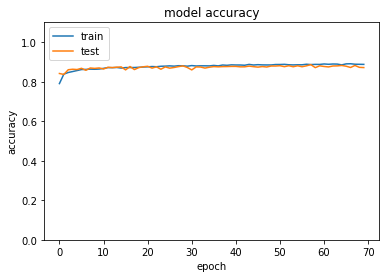

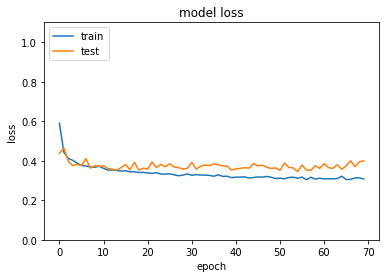

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0, 1.1])
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0, 1.1])
plt.show()

## Evaluar el Modelo

In [20]:
# Obtener el score obtenido del modelo
score = model.evaluate(x_test, y_test, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

10000/10000 [==============================] - 0s 22us/sample - loss: 0.4279 - acc: 0.8655
Test loss: 0.4279445987224579
Test accuracy: 0.8655


## Predecir una Imagen

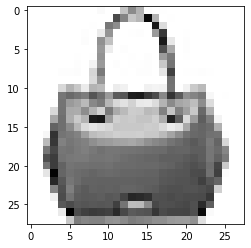

[[2.4093705e-27 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00]]

Prediccion: Bag


In [22]:
# obtener una imagen del dataset
(_, _), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

import random

ind = random.randint(10,1000)

img = x_test[ind]

# imprimir
plt.imshow(img, cmap='Greys')
plt.show()

# normalizar la imagen y expandirla
img = img.astype("float32") / 255
img = img.reshape(28,28)

# generar las probabilidades
y_pred = model.predict(np.array([img]))

# imprimir la lista de probabilidades
print(y_pred)

labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

# argmax saca la clase con la probabilidad mas alta
y_class = y_pred.argmax(axis=-1)

# imprimir la clase
print("")
print("Prediccion:",labels[y_class[0]])